In [99]:
## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings
import descartes
import geopandas as gpd
import json
import requests
import geocoder

# Random Forest.
from sklearn.ensemble import RandomForestRegressor
from shapely.geometry import Point, Polygon
#from urllib2 import urlopen
from urllib.request import urlopen #Python3


# XGBoost.
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
plt.rcParams['figure.figsize'] = (15, 10)

In [102]:
# LECTURAS DE CSV YA PROCESADOS.
train1 = pd.read_csv('DATA/trainProcesado_patov5.csv')
test2 = pd.read_csv('DATA/testProcesado_patov5.csv')

In [109]:
train = pd.DataFrame()
test = pd.DataFrame()
train = train1[['id','precio','mean', 'median', 'metroscubiertos_agrupada', 'provincia', 'ciudad', 'metrostotales_agrupada', 'tipodepropiedad', 'garages', 'banos', 'habitaciones', 'antiguedad_agrupada', 'LUJO', 'REMATE']]
test = test2[['id','mean', 'median', 'metroscubiertos_agrupada', 'provincia', 'ciudad', 'metrostotales_agrupada', 'tipodepropiedad', 'garages', 'banos', 'habitaciones', 'antiguedad_agrupada', 'LUJO', 'REMATE']]

In [110]:
testID = pd.DataFrame()

testID['id'] = test['id']

In [111]:
test.drop('id',1,inplace=True)



In [112]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 13 columns):
mean                        60000 non-null float64
median                      60000 non-null float64
metroscubiertos_agrupada    60000 non-null int64
provincia                   60000 non-null int64
ciudad                      60000 non-null int64
metrostotales_agrupada      60000 non-null int64
tipodepropiedad             60000 non-null int64
garages                     60000 non-null int64
banos                       60000 non-null int64
habitaciones                60000 non-null int64
antiguedad_agrupada         60000 non-null int64
LUJO                        60000 non-null int64
REMATE                      60000 non-null int64
dtypes: float64(2), int64(11)
memory usage: 6.0 MB


In [113]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 15 columns):
id                          240000 non-null int64
precio                      240000 non-null float64
mean                        240000 non-null float64
median                      240000 non-null float64
metroscubiertos_agrupada    240000 non-null int64
provincia                   240000 non-null int64
ciudad                      240000 non-null int64
metrostotales_agrupada      240000 non-null int64
tipodepropiedad             240000 non-null int64
garages                     240000 non-null int64
banos                       240000 non-null int64
habitaciones                240000 non-null int64
antiguedad_agrupada         240000 non-null int64
LUJO                        240000 non-null int64
REMATE                      240000 non-null int64
dtypes: float64(3), int64(12)
memory usage: 27.5 MB


In [114]:
Y = np.array(train['precio'])
X = train.drop('precio', axis = 1)
X.drop('id', axis = 1, inplace = True)

In [115]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 13 columns):
mean                        240000 non-null float64
median                      240000 non-null float64
metroscubiertos_agrupada    240000 non-null int64
provincia                   240000 non-null int64
ciudad                      240000 non-null int64
metrostotales_agrupada      240000 non-null int64
tipodepropiedad             240000 non-null int64
garages                     240000 non-null int64
banos                       240000 non-null int64
habitaciones                240000 non-null int64
antiguedad_agrupada         240000 non-null int64
LUJO                        240000 non-null int64
REMATE                      240000 non-null int64
dtypes: float64(2), int64(11)
memory usage: 23.8 MB


In [116]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)

# XGBOOST

In [117]:
data_dmatrix_inst = xgb.DMatrix(data=trainX,label=trainY)
#X_train_inst, X_test_inst, y_train_inst, y_test_inst = train_test_split(trainX, trainY, test_size=0.25, random_state=100)
xg_reg = xgb.XGBRegressor(objective = 'reg:squarederror', 
                          n_estimators = 500,
                          min_child_weight = 5,
                          learning_rate = 0.05,
                          gamma = 0.2,
                          reg_lambda = 2,
                          max_depth = 5,
                          colsample_bytree = 0.5, 
                          subsample_bytree = 0.8)

In [118]:
xg_reg.fit(trainX,trainY)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.2,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=5, min_child_weight=5, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=2, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, subsample_bytree=0.8,
             verbosity=1)

In [119]:
y_pred = xg_reg.predict(testX)
# Calculamos el error absoluto.
errors = abs(y_pred - testY)
# Imprimimos el error.
print('Error:', round(np.mean(errors), 2), 'grados.')

Error: 450057.79 grados.


In [120]:
# Calculamos el porcentaje de error.
mape = 100 * (errors / testY)
# Calculate la precisión.
accuracy = 100 - np.mean(mape)
print('Precision:', round(accuracy, 2), '%.')

Precision: 79.87 %.


In [121]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 13 columns):
mean                        60000 non-null float64
median                      60000 non-null float64
metroscubiertos_agrupada    60000 non-null int64
provincia                   60000 non-null int64
ciudad                      60000 non-null int64
metrostotales_agrupada      60000 non-null int64
tipodepropiedad             60000 non-null int64
garages                     60000 non-null int64
banos                       60000 non-null int64
habitaciones                60000 non-null int64
antiguedad_agrupada         60000 non-null int64
LUJO                        60000 non-null int64
REMATE                      60000 non-null int64
dtypes: float64(2), int64(11)
memory usage: 6.0 MB


In [122]:
prediccion = xg_reg.predict(test)

In [123]:
testID.head()

,id
0,4941
1,51775
2,115253
3,299321
4,173570


In [124]:
## =================================================================================================
## ARMAMOS EN BASE A LA PREDICCIÓN QUE TENEMOS UN CSV PARA SUBIR A KAGGLE CON EL FORMATO INDICADO!
## =================================================================================================
submission = pd.DataFrame({ 'id': testID['id'], 'target': prediccion })
submission.to_csv("SUBMITS/008_G34_XGBoost_v1.csv", index=False)

# Featuring Importance

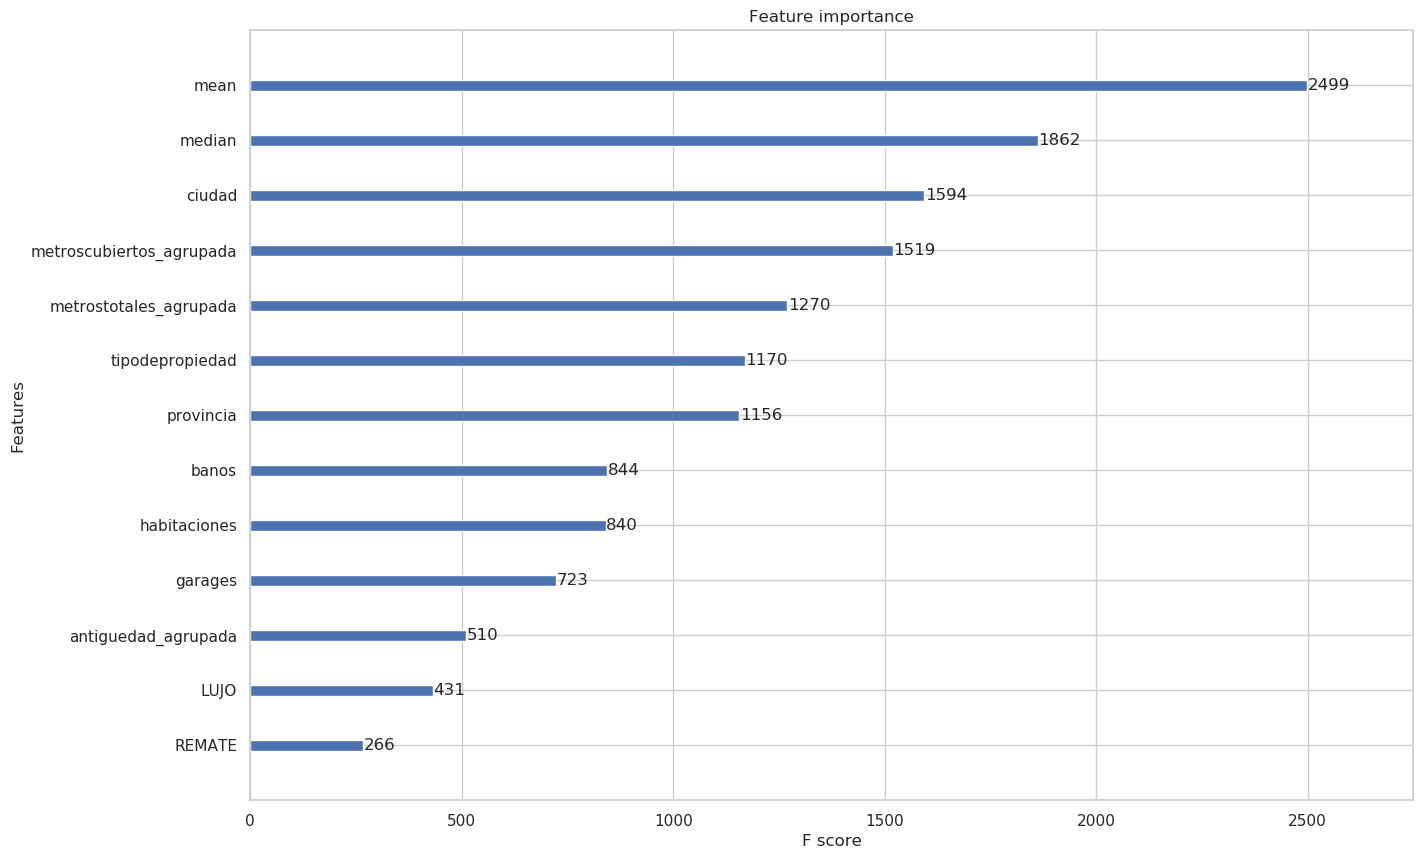

In [125]:
import matplotlib.pyplot as plt

xgb.plot_importance(xg_reg, max_num_features=30)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()